<a href="https://colab.research.google.com/github/jordantangy/Final-Project/blob/main/Jordan's%20working%20test%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plot Model

In [5]:
import pandas as pd
import numpy as np
import csv

data = pd.read_csv('/content/drive/MyDrive/Project_files/movie_plots_by_poster_revised.csv')


,id,poster,title,year,rating,genre,action,adventure,animation,comedy,crime,drama,fantasy,horror,mystery,romance,sci-fi,short,thriller,plot
0,0,https://m.media-amazon.com/images/M/MV5BNDM0ND...,Construction,2021,7.4,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0,"Vin, Bobby, and Ray, are three blue collar..."
1,1,https://m.media-amazon.com/images/M/MV5BNTgyZD...,RED,2020,10.0,horror,0,0,0,0,0,0,0,1,0,0,0,0,0,A small town is terrorized by a mysterious...
2,2,https://m.media-amazon.com/images/M/MV5BNGQzMT...,Huldra and Photographer,2020,10.0,"short, fantasy, horror",0,0,0,0,0,0,1,1,0,0,0,1,0,A nature photographer accidentally capture...
3,3,https://m.media-amazon.com/images/M/MV5BMWE2Yz...,Anti-dirt,2020,10.0,"short, action, comedy",1,0,0,1,0,0,0,0,0,0,0,1,0,"The main character loves his white shirt, ..."
4,4,https://m.media-amazon.com/images/M/MV5BOGI0Nz...,Asalu Em Jarigindhante,2020,10.0,drama,0,0,0,0,0,1,0,0,0,0,0,0,0,Vaasu and Saavi had been in deep love sinc...


In [6]:
import tensorflow_hub as hub
import tensorflow as tf
import torch

plot_model = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(plot_model, input_shape=[], dtype=tf.string, trainable=True)

In [7]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.5.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


In [10]:
x_plots = data.drop(['id','poster','title','year','rating','genre','action','adventure','animation','comedy','crime','drama','fantasy','horror','mystery','romance','sci-fi','short','thriller'], axis = 1)
x_plots = x_plots.to_numpy()

In [12]:
x_plots = x_plots[:30000]

CNN Model

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [14]:
data = pd.read_csv('/content/drive/MyDrive/Project_files/duplicate_free_41K.csv')
truncat = data[:30000]
truncat

,id,poster,title,year,rating,genre,action,adventure,animation,comedy,crime,drama,fantasy,horror,mystery,romance,sci-fi,short,thriller
0,0,https://m.media-amazon.com/images/M/MV5BNDM0ND...,Construction,2021,7.4,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,https://m.media-amazon.com/images/M/MV5BNTgyZD...,RED,2020,10.0,horror,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,https://m.media-amazon.com/images/M/MV5BNGQzMT...,Huldra and Photographer,2020,10.0,"short, fantasy, horror",0,0,0,0,0,0,1,1,0,0,0,1,0
3,3,https://m.media-amazon.com/images/M/MV5BMWE2Yz...,Anti-dirt,2020,10.0,"short, action, comedy",1,0,0,1,0,0,0,0,0,0,0,1,0
4,4,https://m.media-amazon.com/images/M/MV5BOGI0Nz...,Asalu Em Jarigindhante,2020,10.0,drama,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,30023,https://m.media-amazon.com/images/M/MV5BMTU1Nj...,A Mother's Nightmare,2012,6.0,"crime, mystery, thriller",0,0,0,0,1,0,0,0,1,0,0,0,1
29996,30024,https://m.media-amazon.com/images/M/MV5BMTQ3Mz...,SheZow,2012,6.0,"animation, action, adventure",1,1,1,0,0,0,0,0,0,0,0,0,0
29997,30025,https://m.media-amazon.com/images/M/MV5BNDNkN2...,The Seven Year Hitch,2012,6.0,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0
29998,30026,https://m.media-amazon.com/images/M/MV5BNjg5ZD...,Onii-chan Dakedo Ai Sae Areba Kankei Nai yo ne-,2012,6.0,animation,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
!unzip /content/drive/MyDrive/img_41K.zip

Archive:  /content/drive/MyDrive/img_41K.zip
replace img_41K/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace img_41K/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [22]:
int(truncat.shape[0])*0.6+int(truncat.shape[0])*0.2

24000.0

In [26]:
pic_width = 224
pic_height = 224
x_posters_train = []
x_posters_test = []
x_posters_val = []
for i in tqdm(range(int(truncat.shape[0]))):
  if i < int(truncat.shape[0]*0.60)-1 :
    path = '/content/img_41K/'+ str(data['id'][i]) +'.jpg'
    img = image.load_img(path, target_size=(pic_width,pic_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    x_posters_train.append(img)
  elif i > int(truncat.shape[0]*0.60)-1 and i < int(truncat.shape[0]*0.8)-1 :
    path = '/content/img_41K/'+ str(data['id'][i]) +'.jpg'
    img = image.load_img(path, target_size=(pic_width,pic_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    x_posters_test.append(img)
  else :
    path = '/content/img_41K/'+ str(data['id'][i]) +'.jpg'
    img = image.load_img(path, target_size=(pic_width,pic_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    x_posters_val.append(img)

100%|██████████| 30000/30000 [01:56<00:00, 258.32it/s]


In [27]:
x_posters_train = np.array(x_posters_train)
x_posters_test = np.array(x_posters_test)
x_posters_val = np.array(x_posters_val)

In [32]:
x_posters_train.shape[0]

17999

In [34]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [35]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
import numpy as np
import argparse
import locale
import os


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


In [37]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
import numpy as np
import argparse
import locale
import os

In [38]:
inputA = tf.keras.Input(shape= x_posters_train[0].shape )
poster_model = tf.keras.Sequential()
# the first branch operates on the first input
poster_model = Conv2D(16, 3, activation='relu')(inputA)
poster_model = BatchNormalization()(poster_model)
poster_model = MaxPool2D(pool_size=(2, 2))(poster_model)
poster_model = Dropout(0.1)(poster_model)

poster_model = Conv2D(32, 3, activation='relu')(poster_model)
poster_model = BatchNormalization()(poster_model)
poster_model = MaxPool2D(pool_size=(2, 2))(poster_model)

poster_model = Conv2D(64, 3, activation='relu')(poster_model)
poster_model = BatchNormalization()(poster_model)
poster_model = MaxPool2D(pool_size=(2, 2))(poster_model)
poster_model = Dropout(0.2)(poster_model)

poster_model = Conv2D(128, 3, activation='relu')(poster_model)
poster_model = BatchNormalization()(poster_model)
poster_model = MaxPool2D(pool_size=(2, 2))(poster_model)

poster_model = Flatten()(poster_model)

poster_model = Dense(128, activation='relu')(poster_model)
poster_model = BatchNormalization()(poster_model)

poster_model = Dense(128, activation='relu')(poster_model)
poster_model = BatchNormalization()(poster_model)

poster_model = Dense(13,activation="sigmoid")(poster_model)
poster_model = tf.keras.Model(inputs=inputA, outputs=poster_model)

poster_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128   

In [39]:
plot_model = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(plot_model, input_shape=[], dtype=tf.string, trainable=True)
#hub_layer = hub.KerasLayer(hub_handle, output_shape=[20], input_shape=[], dtype=tf.string, trainable=True)
input = Input(shape=(), name="Input", dtype=tf.string)
net = hub_layer(input)
net = tf.keras.layers.Dense(16, activation='relu')(net)
output = tf.keras.layers.Dense(13)(net)
plot_model = Model(input, output)
plot_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None,)]                 0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 512)               256797824 
_________________________________________________________________
dense_3 (Dense)              (None, 16)                8208      
_________________________________________________________________
dense_4 (Dense)              (None, 13)                221       
Total params: 256,806,253
Trainable params: 256,806,253
Non-trainable params: 0
_________________________________________________________________


In [40]:
combined = tf.keras.layers.concatenate([plot_model.output, poster_model.output])

In [41]:
z = tf.keras.layers.Dense(16, activation="relu")(combined)
z = tf.keras.layers.Dense(13, activation="sigmoid")(z)


In [42]:
mymodel = tf.keras.Model(inputs=[plot_model.input, poster_model.input], outputs=z)
mymodel.output_shape

(None, 13)

In [43]:
combined = concatenate([plot_model.output,poster_model.output])
combined_x = Dense(4, activation="relu")(combined)
coombined_x = Dense(13, activation="linear")(combined_x)
model = Model(inputs=[plot_model.input, poster_model.input], outputs=combined_x)

In [44]:
mymodel.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [45]:
y = truncat.drop(['id','poster','title','year','rating','genre'], axis = 1)
y = y.to_numpy()

In [67]:
y_train = y[:17999]
y_test = y[17999:(17999+5999)]
y_val = y[(17999+5999):]

In [50]:
x_plots_train = x_plots[:17999]


(6002, 224, 224, 3)

In [63]:
x_plots_test = x_plots[17999:(17999+5999)]
x_plots_val = x_plots[(17999+5999):]

In [ ]:
x_posters_val = x_posters[:4]
partial_x_posters = x_posters[4:]

x_plots_val = x_plots[:4]
partial_x_plots = x_plots[4:]

y_val = y[:4]
partial_y = y[4:5]

In [68]:
history = mymodel.fit([x_plots_train,x_posters_train],
                    y_train,
                    epochs=3,
                    batch_size=50,
                    validation_data=([x_plots_val, x_posters_val],y_val),
                    verbose=13)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


Epoch 2/3
Epoch 3/3


In [93]:
preds = mymodel.predict([x_plots_test, x_posters_test])

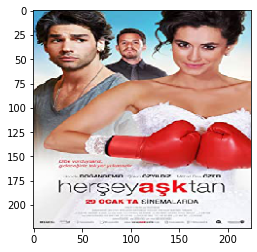

In [99]:
plt.imshow(x_posters_test[0])